In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [3]:
cd ../../

/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4


In [4]:
phases = ['/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1', '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2',
          '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042524']
files = [file for directory in phases for file in glob.glob(f'{directory}/*.npz')]
table = pd.read_csv('Leusch_Stuff/RA_Sorted.csv')

In [5]:
files

['/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec36_L170_B27.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec135_L134_B47.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec69_L170_B40.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec105_L170_B54.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec23_L161_B23.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec41_L157_B30.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec32_L175_B23.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec132_L147_B57.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase1/spec116_L157_B54.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase

In [6]:
# sort files by the original "galactic index" which ordered 
# the coordinates in galactic 
leusch_data = sorted(files, key=lambda x: np.load(x)['coords'][5])

In [7]:
leusch_data

['/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec292_L60_B20.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec286_L60_B23.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec277_L60_B27.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec270_L60_B30.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec261_L60_B34.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec252_L60_B37.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec244_L60_B40.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec236_L60_B44.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/spec229_L60_B47.npz',
 '/Users/hopediffenderfer/Desktop/ay121/FFC_folder/FFC_4/data/obs_042424/Phase2/sp

In [8]:
# make length object, empty arrays
len_testdata = len(leusch_data) 
pwr0 = [] 
pwr1 = []
unix = []
coordinates = []
alt_az = []
jd = []
galactic = []

# iterate through all 'testdata' object 
# grab info as well 
for n in range(len_testdata):
    test_dataFiles = np.load(leusch_data[n])
    # spectra 
    pwr0.append(test_dataFiles["data0"]) # Append data
    pwr1.append(test_dataFiles["data1"])
    unix.append(test_dataFiles['time'][()])
    coordinates.append(test_dataFiles['coords'])
    galactic.append([test_dataFiles['coords'][1], test_dataFiles['coords'][2]])
    jd.append(test_dataFiles['jd'])

In [9]:
# shift all da spectra

for i in range(len(pwr0)): 
    pwr0[i] = np.fft.fftshift(pwr0[i])

for i in range(len(pwr1)):
    pwr1[i] = np.fft.fftshift(pwr1[i])

In [63]:
freqs = 1420 + np.fft.fftshift(np.fft.fftfreq(1025, 1/3.2))

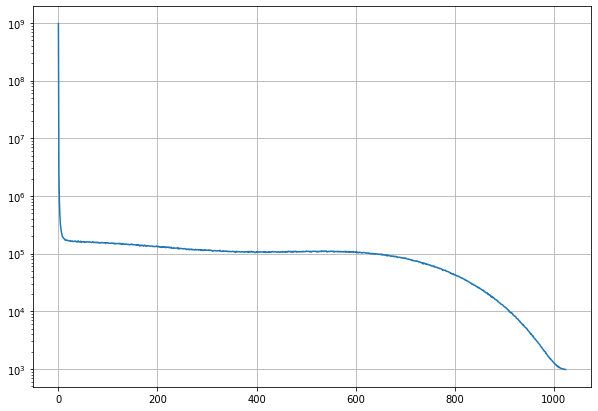

In [77]:
switch_set = pwr0[10][0:1025] 
switch_index = np.arange(0, 1025, 1)
switched = np.flip(switch_set)

plt.figure(figsize=(10,7))
plt.semilogy(switched) # NOTE: no hydrogen! because we took the mirror side of FFT and flipped it
plt.grid()
plt.show()

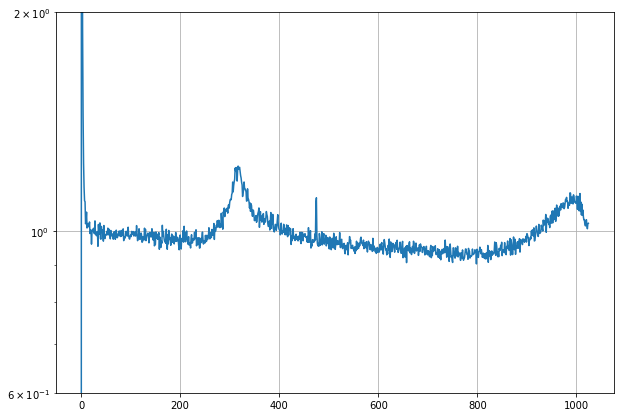

In [65]:
# now divide it, and plot
pwr0_flat_please = pwr0[10][1023:2048]/switched

plt.figure(figsize=(10,7))
plt.semilogy(pwr0_flat_please)
plt.ylim(0.6, 2)
plt.grid()
plt.show()

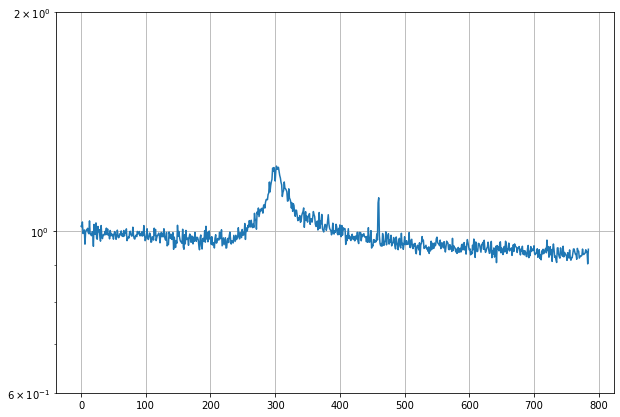

In [76]:
# that spike at 0 is ugly. let's exclude her from now on, and exclude the end bit too: 
pwr0_flatter = pwr0_flat_please[15:800]
# freq = freqs[15:800]

plt.figure(figsize=(10,7))
plt.semilogy(pwr0_flatter)
plt.ylim(0.6, 2)
plt.grid()
plt.show()

In [73]:
# this is a loop to do that S-line division to all of the power spectra

divided0 = [] 
chunked0 = []
for i in range(len(pwr0)):
    spectra = pwr0[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[5:800]
    divided0.append(flatter)
    chunked0.append(chunked)

divided1 = []
chunked1 = []
for i in range(len(pwr1)):
    spectra = pwr1[i]
    switch_set = spectra[0:1024] 
    switched = np.flip(switch_set)
    flatter = spectra[1024:2048]/switched
    chunked = flatter[50:800]
    divided1.append(flatter)
    chunked1.append(chunked)

# fre = freqs[5:800]
    
# in these loops, once we find gain, we can just multiply 
# the new T-line spectra (the "flatter" and "chunked") by that gain value

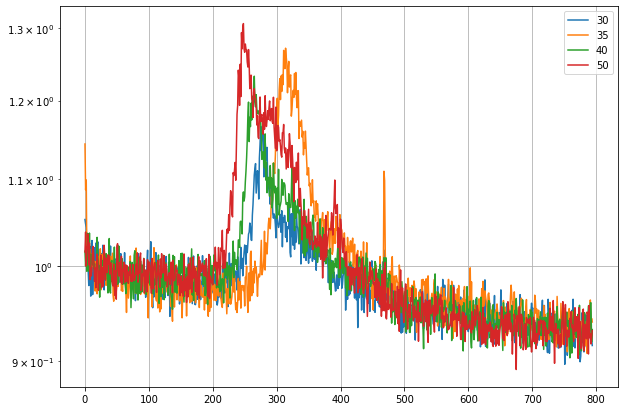

In [75]:
plt.figure(figsize=(10,7))
plt.semilogy(chunked0[30], label='30')
plt.semilogy(chunked0[35], label='35')
plt.semilogy(chunked0[40], label='40')
plt.semilogy(chunked0[50], label='50')
plt.legend()
plt.grid()
plt.show()

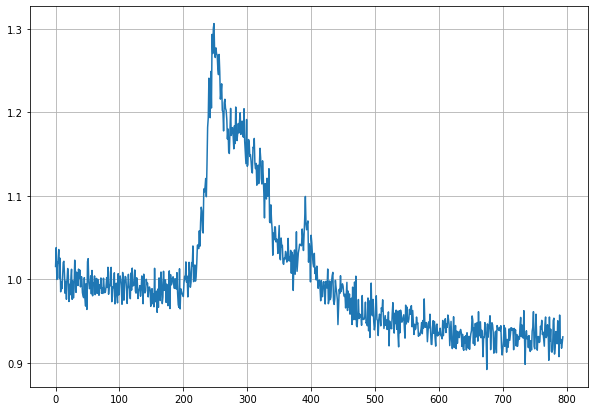

In [22]:
chunk_test = chunked0[50]

plt.figure(figsize=(10,7))
plt.plot(chunk_test)
plt.grid()
plt.show()

In [23]:
Xs = np.arange(50, 801, 1)
Xs

array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23

In [25]:
print(len(chunk_test))
print(len(Xs))

795
751


In [26]:

avg_part1 = np.mean(chunk_test[0:200])
avg_part2 = np.mean(chunk_test[600:-1])

print(avg_part1, avg_part2)

Xs = np.arange(0, 795, 1)

deg_1_slope = avg_part2 - avg_part1
print(deg_1_slope)

line = deg_1_slope*Xs + 1

line_resid = chunk_test - line

0.9924032504606403 0.9329647186318052
-0.05943853182883507


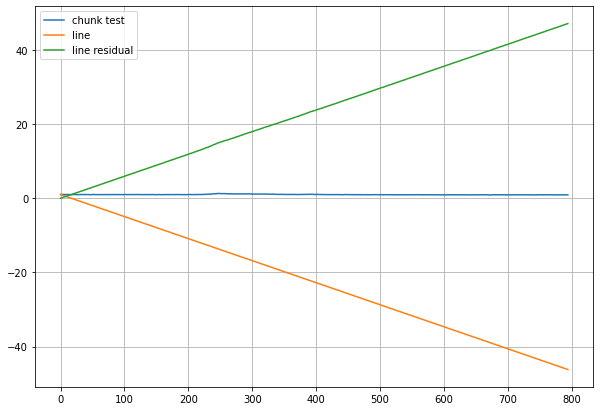

In [34]:
plt.figure(figsize=(10,7))
plt.plot(chunk_test, label='chunk test')
plt.plot(line, label='line')
plt.plot(line_resid, label='line residual')
plt.grid()
plt.legend()
plt.show()

In [38]:
# pos_freqs = freqs[1024:2048]
# chunked_freqs = pos_freqs[50:800]

# coeffs = np.polyfit(chunked_freqs, chunk_test[50:800], 2)

# fitted_curve2 = np.polyval(coeff2, corr_freq_chop)
# residuals_2 = T_chop - fitted_curve2


# len(chunked0)

In [39]:
from scipy.signal import find_peaks

In [40]:
# getting the peaks 
# NOTE: this will work the same once we get temperature
# in reality we will be passing calibrated T-line spectra through this
peaks_array = []
for i in range(len(chunked0)):
    peaks_indices, _ = find_peaks(chunked0[i]) # get indices of the peaks 
    peak_values_pre = [] # make empty array for storing peak values in nested loop
    for j in range(len(peaks_indices)):
        indiv_peaks = chunked0[i][peaks_indices[j]] # grab peak value at index of the individual spectra
        peak_values_pre.append(indiv_peaks) # append the peak value to a list of peak values for THAT spectra
    peak_max = max(peak_values_pre) # take the max of the peak values array, THAT'S the MAIN HI peak for that spectra
    peaks_array.append(peak_max)

In [41]:
print('min peak = ' + str(np.min(peaks_array)))
print('max peak = ' + str(np.max(peaks_array)))
peaks_array

min peak = 1.028433385651837
max peak = 8.851527661074917


[1.2423989087322675,
 1.1436405495278679,
 1.1194064198158558,
 1.123765981091869,
 1.1281185826581428,
 1.1212717447784728,
 1.15355323079509,
 1.1973870390832793,
 1.2363204436945407,
 1.2738565151918118,
 1.2293502596386296,
 1.3030010396870604,
 1.2206095704897753,
 1.1754201559598976,
 1.1697172797448177,
 1.1602763943370236,
 1.1303051009346947,
 1.1390249973096682,
 1.1649487668431964,
 1.1964218873231134,
 1.2371343844983356,
 1.3083555522578665,
 1.2797023635957547,
 1.269864034547211,
 1.1497973015910783,
 1.1495765330935692,
 1.138160841987473,
 1.1424181339688302,
 1.1473396771755424,
 1.1770035301995443,
 1.1671418788863956,
 1.203381260946015,
 1.2238389368352,
 1.2684127640532044,
 1.3079796117368927,
 1.271437807882889,
 1.2089076981432403,
 1.2279681217232319,
 1.19334598939091,
 1.231121115406884,
 1.2327288171202249,
 1.229625275843516,
 1.2287999253052786,
 1.2389184540412432,
 1.2163826132598081,
 1.2990549053413563,
 1.327162145700718,
 1.30687708184101,
 1.342357

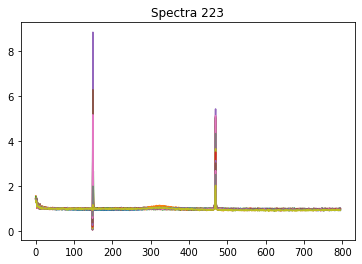

In [42]:
fucked_spectra = []
for i in range(len(peaks_array)):
    if peaks_array[i] > 2: 
        plt.plot(chunked0[i])
        plt.title(f'Spectra {i}'.format(str))
        fucked_spectra_index = int(i)
        fucked_spectra.append(fucked_spectra_index)

In [43]:
len(fucked_spectra)

39

In [44]:
fucked_spectra

[180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223]

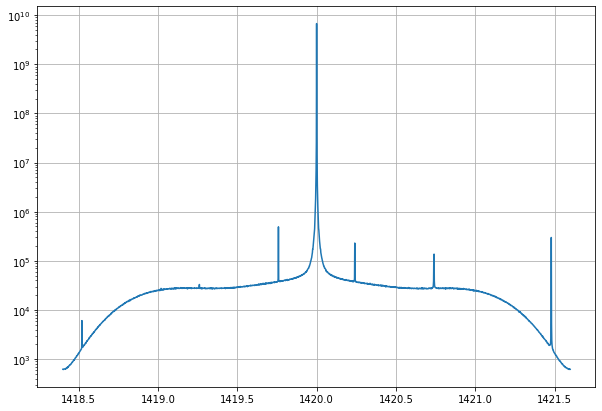

In [46]:
plt.figure(figsize=(10,7))
plt.semilogy(freqs, pwr0[193])
plt.grid()
plt.show()

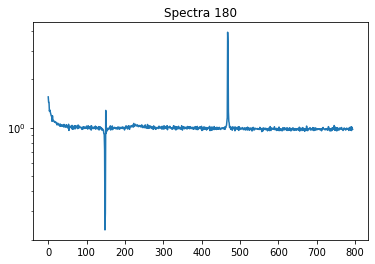

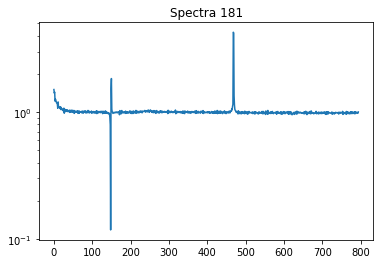

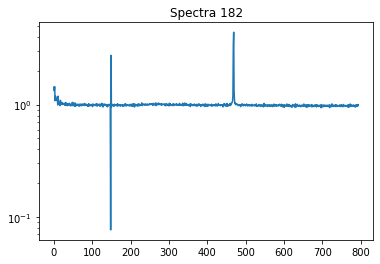

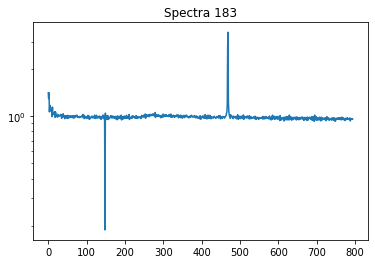

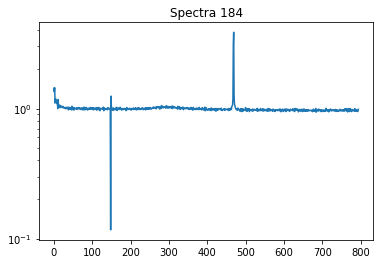

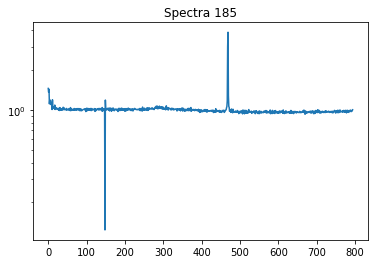

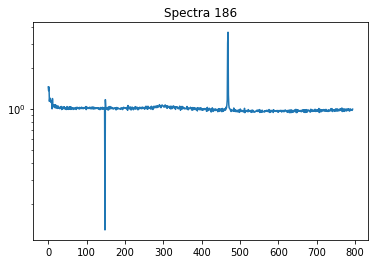

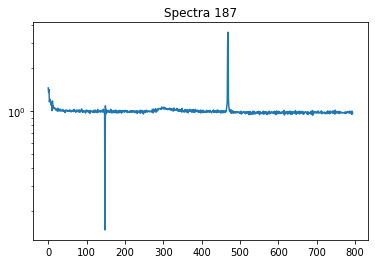

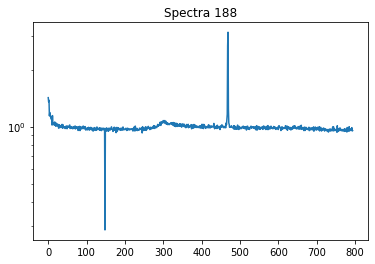

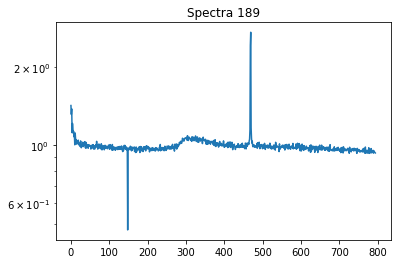

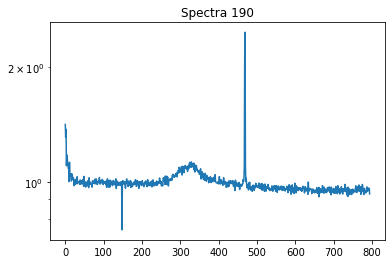

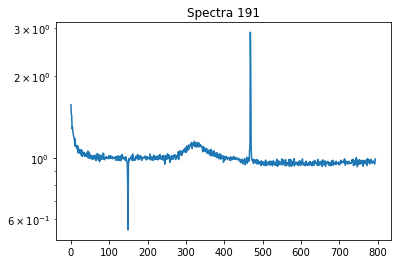

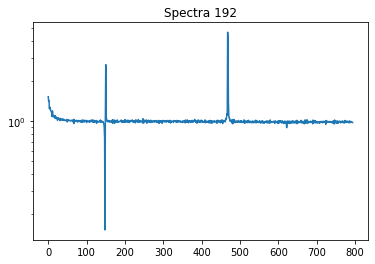

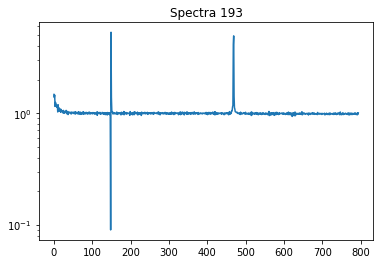

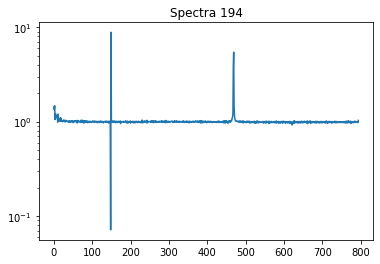

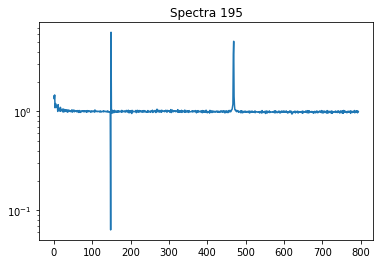

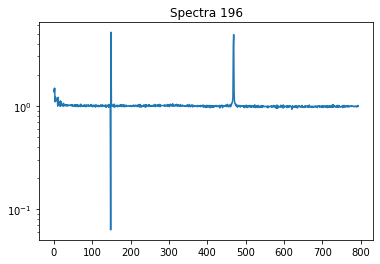

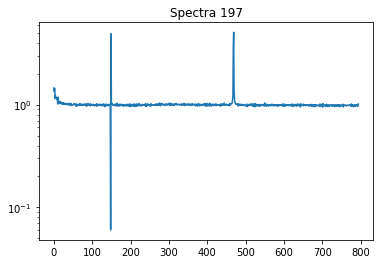

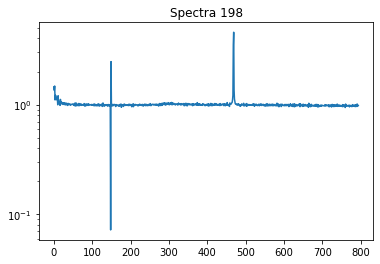

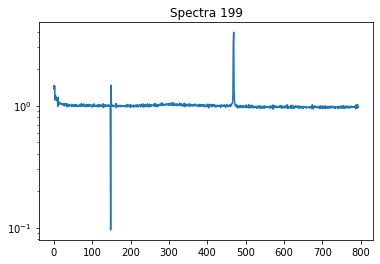

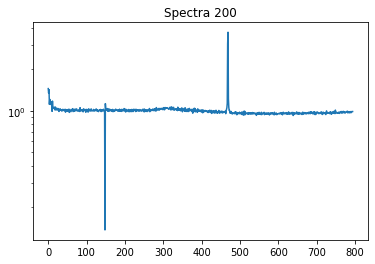

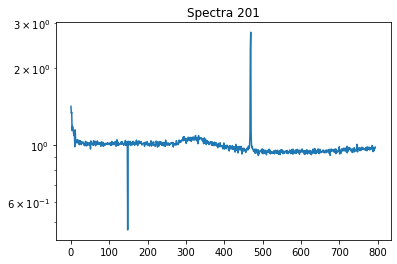

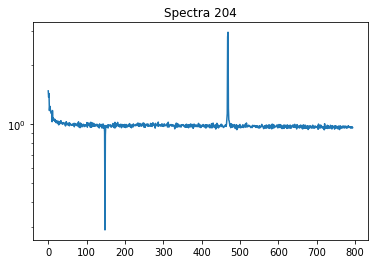

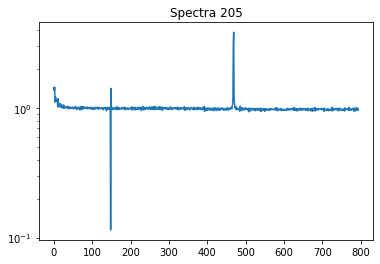

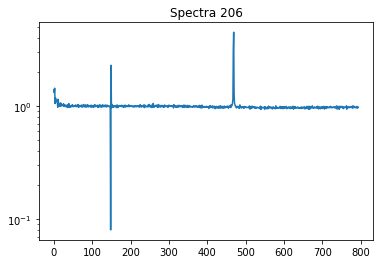

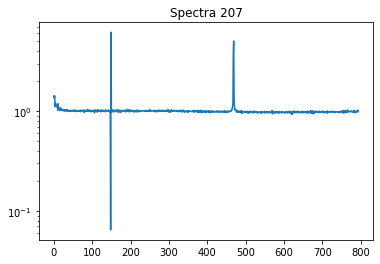

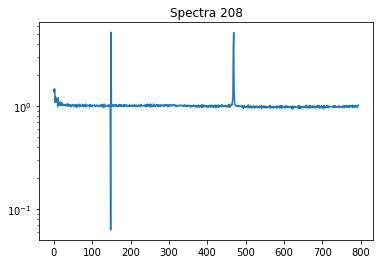

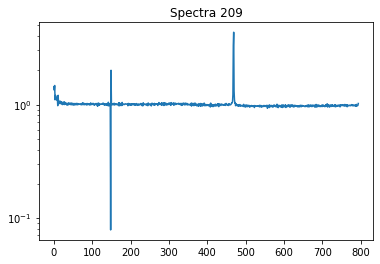

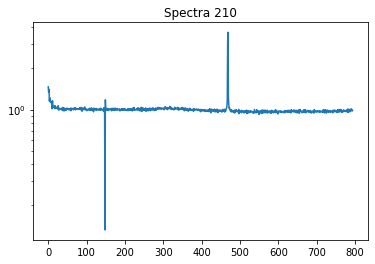

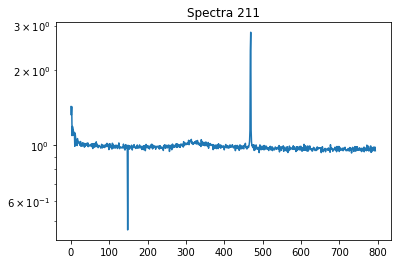

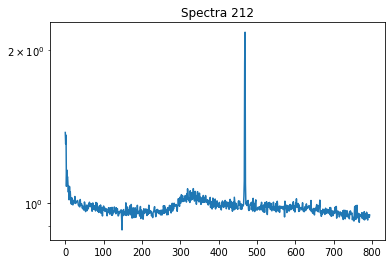

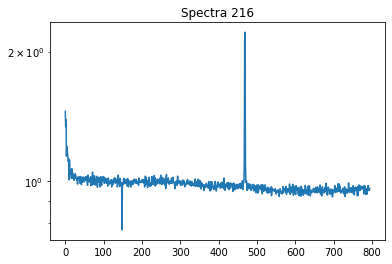

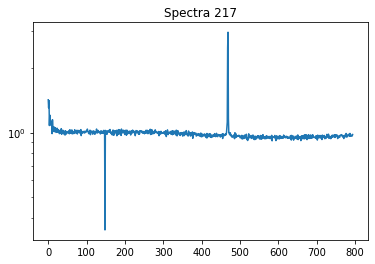

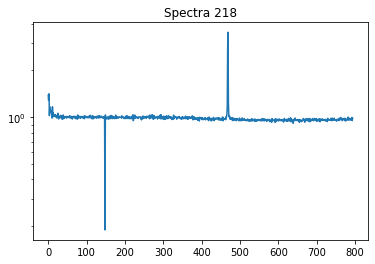

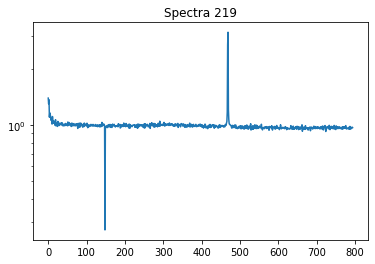

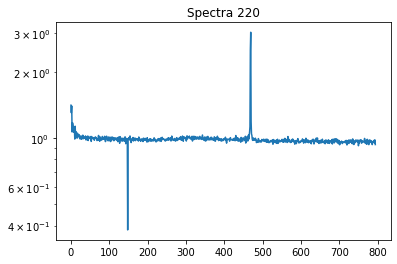

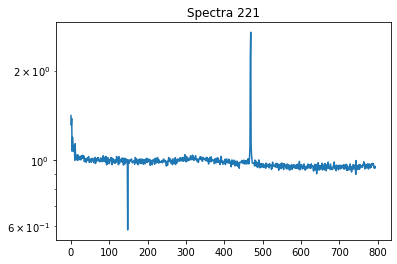

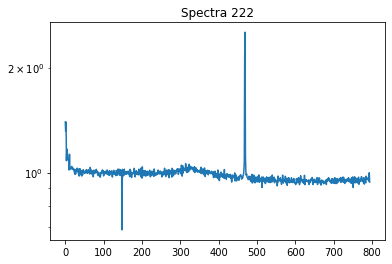

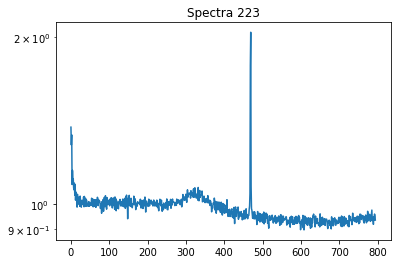

In [48]:
for fucked in fucked_spectra:
    plt.figure()
    plt.semilogy(chunked0[fucked])
    plt.title(f'Spectra {fucked}'.format(str))
    plt.show()

In [49]:
# because of how data was collected, the galactic coordinates are saved in the object "galactic"
print(len(galactic))
galactic
# and thankfully, because of the beginning, they are ordered exactly 
# the same as the spectra! 

313


[[60.0, 20.0],
 [60.0, 23.4],
 [60.0, 26.8],
 [60.0, 30.2],
 [60.0, 33.599999999999994],
 [60.0, 36.99999999999999],
 [60.0, 40.39999999999999],
 [60.0, 43.79999999999999],
 [60.0, 47.19999999999999],
 [60.0, 50.59999999999999],
 [60.0, 53.99999999999999],
 [60.0, 57.399999999999984],
 [64.6, 20.0],
 [64.6, 23.4],
 [64.6, 26.8],
 [64.6, 30.2],
 [64.6, 33.599999999999994],
 [64.6, 36.99999999999999],
 [64.6, 40.39999999999999],
 [64.6, 43.79999999999999],
 [64.6, 47.19999999999999],
 [64.6, 50.59999999999999],
 [64.6, 53.99999999999999],
 [64.6, 57.399999999999984],
 [69.19999999999999, 20.0],
 [69.19999999999999, 23.4],
 [69.19999999999999, 26.8],
 [69.19999999999999, 30.2],
 [69.19999999999999, 33.599999999999994],
 [69.19999999999999, 36.99999999999999],
 [69.19999999999999, 40.39999999999999],
 [69.19999999999999, 43.79999999999999],
 [69.19999999999999, 47.19999999999999],
 [69.19999999999999, 50.59999999999999],
 [69.19999999999999, 53.99999999999999],
 [69.19999999999999, 57.3999

In [51]:
# so make combined array pulling peak value and assigning to coordinates

combined_array = []
for i in range(len(galactic)):
    combined = [galactic[i], peaks_array[i]]
    combined_array.append(combined)
    
print(combined_array)

[[[60.0, 20.0], 1.2423989087322675], [[60.0, 23.4], 1.1436405495278679], [[60.0, 26.8], 1.1194064198158558], [[60.0, 30.2], 1.123765981091869], [[60.0, 33.599999999999994], 1.1281185826581428], [[60.0, 36.99999999999999], 1.1212717447784728], [[60.0, 40.39999999999999], 1.15355323079509], [[60.0, 43.79999999999999], 1.1973870390832793], [[60.0, 47.19999999999999], 1.2363204436945407], [[60.0, 50.59999999999999], 1.2738565151918118], [[60.0, 53.99999999999999], 1.2293502596386296], [[60.0, 57.399999999999984], 1.3030010396870604], [[64.6, 20.0], 1.2206095704897753], [[64.6, 23.4], 1.1754201559598976], [[64.6, 26.8], 1.1697172797448177], [[64.6, 30.2], 1.1602763943370236], [[64.6, 33.599999999999994], 1.1303051009346947], [[64.6, 36.99999999999999], 1.1390249973096682], [[64.6, 40.39999999999999], 1.1649487668431964], [[64.6, 43.79999999999999], 1.1964218873231134], [[64.6, 47.19999999999999], 1.2371343844983356], [[64.6, 50.59999999999999], 1.3083555522578665], [[64.6, 53.99999999999999

TypeError: Invalid shape (313,) for image data

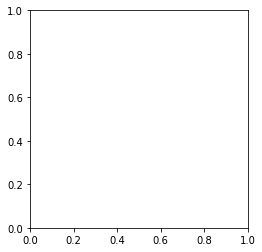

In [57]:
plt.imshow(peaks_array)